# CNN for AED with Keras/TensorFlow

Date: March 2, 2019

Classification of acoustic events:

- Umai
- Mazui
- Oishii
- Others
- Silence

## Preparing data set for CNN

In [2]:
DATASET_FOLDER = '../dataset/data_restaurant'

%run ../oscilloscope/script/dataset.py

ds = DataSet(DATASET_FOLDER)
train_data, train_labels, test_data, test_labels = ds.generate()
shape = ds.shape
class_labels = ds.class_labels

In [2]:
shape

(64, 40)

### CNN model

In [3]:
from keras import layers
from keras import models

model = models.Sequential()

model.add(layers.Conv2D(8, (3, 3), activation='relu', input_shape=(*shape, 1)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(16, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(32, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dense(128, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(len(class_labels), activation='softmax'))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 62, 38, 8)         80        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 31, 19, 8)         0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 29, 17, 16)        1168      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 8, 16)         0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 12, 6, 32)         4640      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 6, 3, 32)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 576)               0         
__________

In [4]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

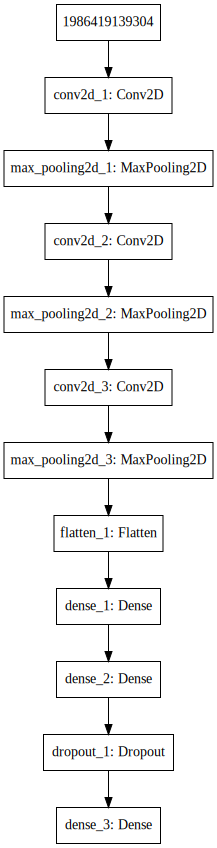

In [5]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot

SVG(model_to_dot(model).create(prog='dot', format='svg'))

## Training CNN

In [6]:
EPOCHS = 30
history = model.fit(train_data, train_labels, epochs=EPOCHS, validation_data=(test_data, test_labels))

Train on 560 samples, validate on 240 samples
Epoch 1/30
560/560 [==============================] - 25s 45ms/step - loss: 1.9469 - acc: 0.2571 - val_loss: 1.6646 - val_acc: 0.2708
Epoch 2/30
560/560 [==============================] - 23s 40ms/step - loss: 1.4228 - acc: 0.4786 - val_loss: 1.0805 - val_acc: 0.6375
Epoch 3/30
560/560 [==============================] - 22s 40ms/step - loss: 0.9812 - acc: 0.6429 - val_loss: 0.7711 - val_acc: 0.7875
Epoch 4/30
560/560 [==============================] - 23s 41ms/step - loss: 0.6711 - acc: 0.7696 - val_loss: 0.5497 - val_acc: 0.8167
Epoch 5/30
560/560 [==============================] - 23s 41ms/step - loss: 0.5322 - acc: 0.8232 - val_loss: 0.4002 - val_acc: 0.8833
Epoch 6/30
560/560 [==============================] - 22s 40ms/step - loss: 0.4518 - acc: 0.8500 - val_loss: 0.3976 - val_acc: 0.8875
Epoch 7/30
560/560 [==============================] - 22s 39ms/step - loss: 0.2757 - acc: 0.9161 - val_loss: 0.5516 - val_acc: 0.8250
Epoch 8/30
560/5

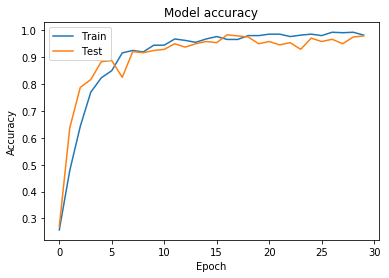

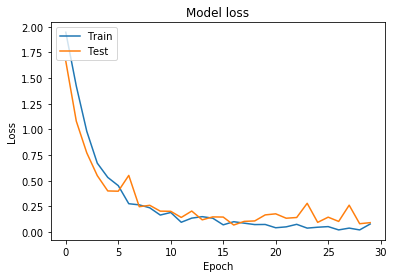

In [20]:
%run history.py
%matplotlib inline

plot_accuracy(history)
plot_loss(history)

## Save the model

In [21]:
import datetime

dt = datetime.datetime.today().strftime('%Y%m%d%H%M%S')
filename = DATASET_FOLDER + '/cnn_for_aed_restaurant{}.h5'.format(dt)
model.save(filename)

## Load the model

In [22]:
del model
model = models.load_model(filename)

## Confirmation

In [23]:
import numpy as np
import matplotlib.pyplot as plt
train_data.shape

(560, 64, 40, 1)

In [24]:
layer_outputs = [layer.output for layer in model.layers]
#layer_outputs

In [25]:
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)
activations = activation_model.predict(test_data)
#activations[0][0,:,:,0].shape

In [26]:
class_labels

['umai', 'mazui', 'oishii', 'silence', 'others', 'a', 'i', 'o']

In [27]:
(activations[-1][:10]*100).astype(int)

array([[  0,   0,   0,   0,   0, 100,   0,   0],
       [  0,   0,   0,  99,   0,   0,   0,   0],
       [  0,   0,   0,   0, 100,   0,   0,   0],
       [  0,   0,  99,   0,   0,   0,   0,   0],
       [100,   0,   0,   0,   0,   0,   0,   0],
       [  0,  99,   0,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,   0, 100],
       [  0,   0,   0,   0,   0,   0,   0, 100],
       [  0,   0,  99,   0,   0,   0,   0,   0],
       [  0,   0,   0,   0,   0,   0,  99,   0]])

In [28]:
test_labels[:10].astype(int)

array([[0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 0],
       [0, 1, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 1, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0]])

In [29]:
def plot_layer(activations, sample, layer):
    a = activations[layer].shape
    rows = int(a[3]/4)
    fig, axarr = plt.subplots(rows, 4, figsize=[20,15])
    for i in range(a[3]):
        row = int(i/4)
        x, y = row, i-4*row
        axarr[x, y].imshow(np.rot90(activations[layer][sample, :, :, i]))
        axarr[x, y].set_xticks([])
        axarr[x, y].set_yticks([])

'others'

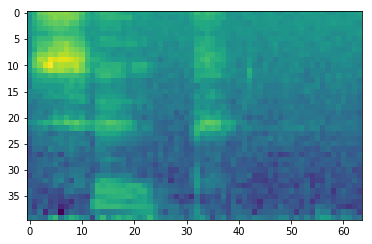

In [30]:
image_number = 29

plt.imshow(np.rot90(test_data[image_number,:,:,0]))
class_labels[np.argmax(test_labels[image_number])]

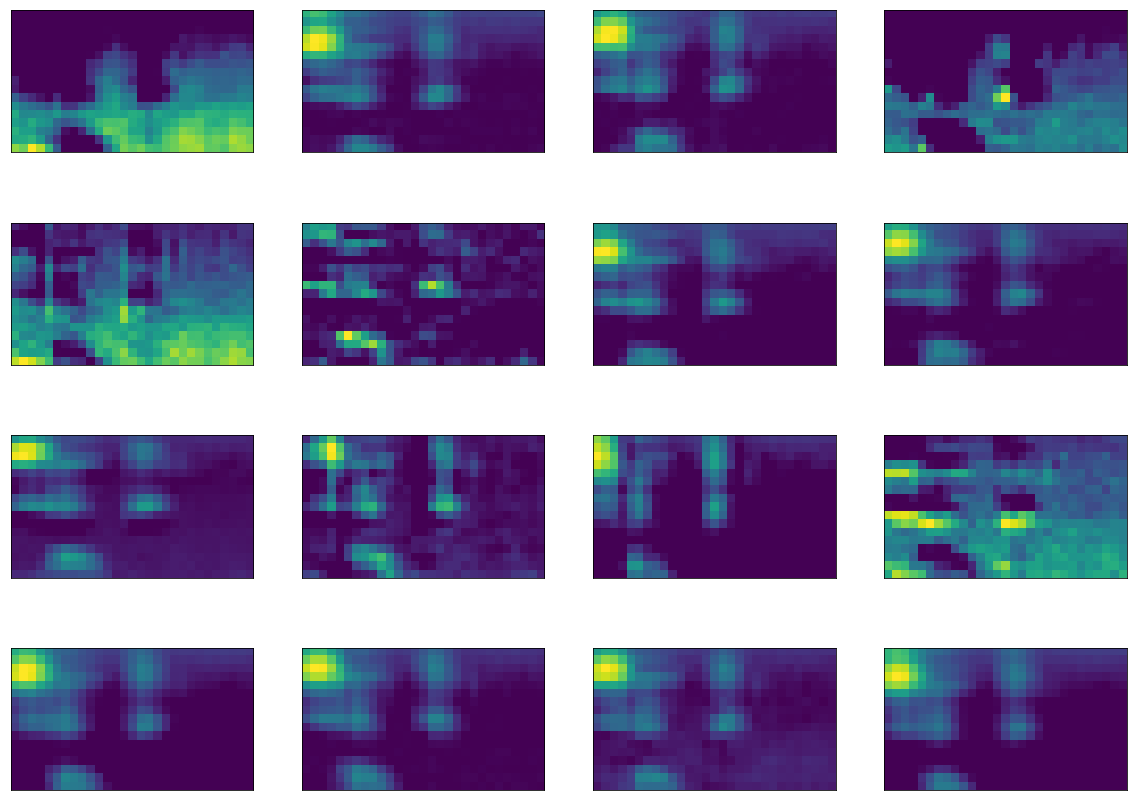

In [31]:
plot_layer(activations, image_number, 2)

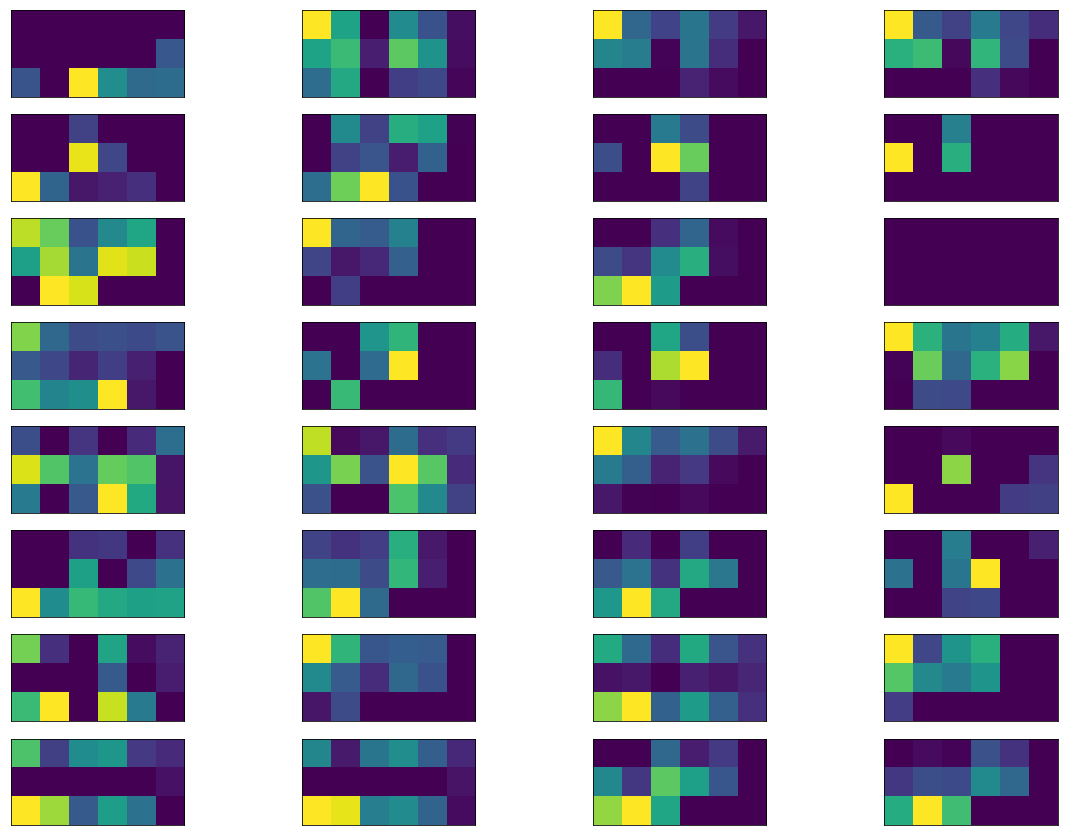

In [32]:
plot_layer(activations, image_number, 5)